# $W_0$ distributions

**What's in this notebook?** This notebook reads in the data obtained in https://inspirehep.net/literature/2683676 and generates one plot for the $W_0$ distribution.


(*Created:* Andreas Schachner, August 6, 2023)

## Imports

### Install

In [1]:
!pip install --quiet seaborn

### General imports

In [12]:
import sys, os, warnings, glob, pickle, gzip
import numpy as np
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap=sn.color_palette("viridis", as_cmap=True)

import pandas as pd
from matplotlib.gridspec import GridSpec

def load_zipped_pickle(filen):
    r"""
    **Description:**
    Returns content of zipped pickle file.
    
    
    Args:
       filen (string): Filename of zipped file to be read.
        
    Returns:
       ArrayLike/dict: Data contained in file.
    
    """
    
    with gzip.open(filen, 'rb') as f:
        loaded_object = pickle.load(f)
            
    f.close()
            
    return loaded_object

def save_zipped_pickle(obj, filen, protocol=-1):
    r"""
    **Description:**
    Saves data in a zipped pickle file.
    
    
    Args:
       obj (array/dict): Data to be stored in file.
       filen (string): Filename of file to be read.
        
    Returns:
        
    
    """
    with gzip.open(filen, 'wb') as f:
        pickle.dump(obj, f, protocol)
        
    f.close()
    
def mergeDictionary(dict_1, dict_2):
    r"""
    
    **Description:**
    Merge two dictionaries.
    
    
    Args:
        dict_1 (dict): First dictionary.
        dict_2 (dict): Second dictionary.
        
    Returns:
        dict (dict): Combined dictionary.
    
    """
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
            dict_3[key] = np.append(value , dict_1[key],axis=0)
            
    return dict_3

## Loading data

In [9]:
hodge_pairs = [[2,144],[2,120],[2,132],[2,128],[2,272],[3,99],[3,115],[3,107],[3,119],[3,243],[4,122],[4,130],[4,118],[4,142],[4,98],[5,149],[5,153],[5,165],[5,89],[5,213]]
# pick a Hodge pair:
hodge_pair = hodge_pairs[0]
h12 = hodge_pair[0]
h11 = hodge_pair[1]
path = f"./model_h12_{h12}_h11_{h11}/"
files = glob.glob(path+"*")
d = {}
for file in tqdm(files):
    dd = load_zipped_pickle(file)
    dd["h11"] = np.ones(len(dd["KP"])).astype(int)*h11
    dd["h12"] = np.ones(len(dd["KP"])).astype(int)*h12
    
    if len(d)==0:
        d = dd
    else:
        d = mergeDictionary(d, dd)

  0%|          | 0/71 [00:00<?, ?it/s]

,KP,Re(W),Im(W),NFlux
0,-7.148220,-176.862970,-174.613587,87
1,-5.677894,26.458489,-174.141509,136
2,-5.248552,-81.295633,-41.584889,68
3,-5.166363,48.504439,111.317388,133
4,-5.165747,20.742726,68.142026,91
...,...,...,...,...
869498,-6.882048,248.854117,-25.402886,95
869499,-4.533008,77.727286,22.267667,100
869500,-5.016929,35.027835,100.033021,130
869501,-5.038733,33.670344,-36.407112,59


## Plot $W_0$ distribution for all models

Collect data in dataframe

In [19]:
hodge_pairs = [[2,144,3],[2,120,4],[2,132,5],[2,128,6],[2,272,7],[3,99,3],[3,115,4],[3,107,5],[3,119,6],[3,243,7],[4,122,3],[4,130,4],[4,118,5],[4,142,6],[4,98,7],[5,149,3],[5,153,4],[5,165,5],[5,89,6],[5,213,7]]
# pick a Hodge pair:
dfs = []
for hodge_pair in tqdm(hodge_pairs):
    h12 = hodge_pair[0]
    h11 = hodge_pair[1]
    model_ID = hodge_pair[2]
    path = f"./model_h12_{h12}_h11_{h11}/"
    files = glob.glob(path+"*")
    d = {}
    for file in files:
        dd = load_zipped_pickle(file)
        dd["h11"] = np.ones(len(dd["KP"])).astype(int)*h11
        dd["h12"] = np.ones(len(dd["KP"])).astype(int)*h12
        dd["model ID"] = np.ones(len(dd["KP"])).astype(int)*model_ID

        if len(d)==0:
            d = dd
        else:
            d = mergeDictionary(d, dd)
            
    keys_drop = ['WGI', 'FTerms', 'fluxes', 'Re(z1)', 'Re(z2)', 'Re(tau)', 'Im(z1)', 'Im(z2)', 'Im(tau)']
    for key in keys_drop:
        d.pop(key, None)
        
    dfs.append(pd.DataFrame(d))
    
df = pd.concat(dfs)  

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

Generate plot (might take a 1 or 2 minutes)

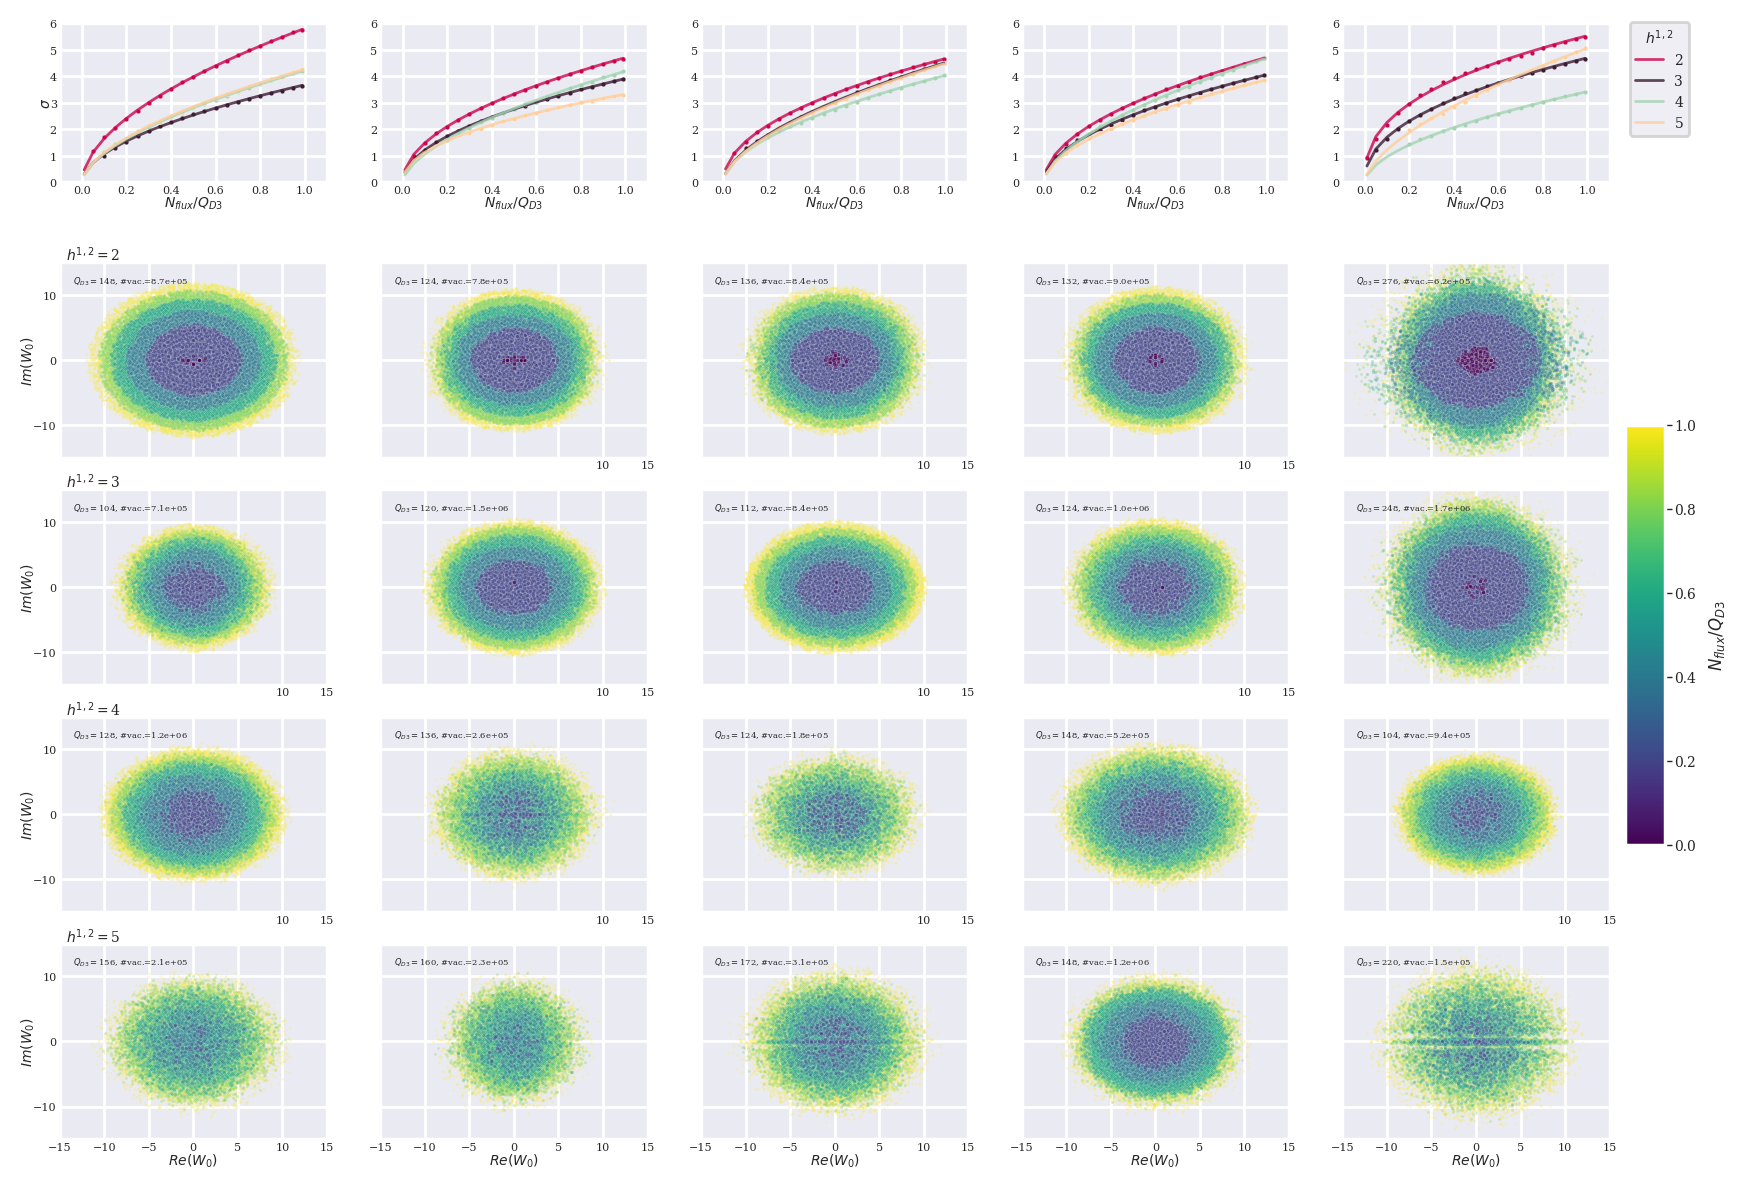

In [25]:
fig = plt.figure(figsize=(10, 6))

gs = GridSpec(nrows=5, ncols=5)

sn.set(rc={"figure.dpi":500, 'savefig.dpi':500})

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

fs=6

# Set the default text font size
# Set the axes title font size
plt.rc('axes', titlesize=fs)
# Set the axes labels font size
plt.rc('axes', labelsize=fs)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=fs)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=fs)

color_lines = ["#ca054d","#3b1c32","#a4d4b4","#ffcf9c","#b96d40"]

df_copy=df.copy()


df_copy["Re(W)"] = df_copy["Re(W)"]*np.exp(df_copy["KP"]/2)
df_copy["Im(W)"] = df_copy["Im(W)"]*np.exp(df_copy["KP"]/2)



def fit_fct_mod(x,n2,n3,h12=None,h11=None):
    
    return np.array(x)**(n2)*n3/(2*(h12+1))**(0.5)

from scipy.optimize import curve_fit




df_copy=df.copy()


df_copy["Re(W)"] = df_copy["Re(W)"]*np.exp(df_copy["KP"]/2)
df_copy["Im(W)"] = df_copy["Im(W)"]*np.exp(df_copy["KP"]/2)



color_col = "NFlux"
fit_res=[]

for i2,mid in enumerate([3,4,5,6,7]):
    
    ax2=fig.add_subplot(gs[0,i2])

    dfc=df_copy.copy()
    
    dfc = dfc[(dfc["model ID"]==mid)]
    
    for i1,h12 in enumerate([2,3,4,5]):
        
        dfcc = dfc.copy()
        dfcc=dfcc[dfcc["h12"]==h12]
        
        QD3=np.max(dfcc["NFlux"])
        
        dfcc["NFlux"]=dfcc["NFlux"]/QD3
        
        ccs_old=np.array([0.99,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0.01])#
        ccs=[]
        vvals=[]
        ccc_count=0
        for ccc in ccs_old:
            
            dfccc = dfcc.copy()
            dfccc = dfccc[(dfccc["NFlux"]<=ccc+0.01)&(dfccc["NFlux"]>=ccc-0.01)]
            
            if len(dfccc)<100:
                continue
            
            dfccc["sig"] = np.sqrt(np.sqrt(np.linalg.det(np.cov(np.append([dfccc["Re(W)"]],[dfccc["Im(W)"]],axis=0)))))
            
            sig_res = dfccc["sig"].to_list()[0]
            
            if np.isnan(sig_res):
                #vvals.append(0)
                continue
            else:
                sn.scatterplot(x=[ccc],y=sig_res,s=3,alpha=1.,color=color_lines[i1])#
            
                vvals.append(sig_res)
                ccs.append(ccc)
            
            ccc_count+=1
            
        def func(x,n1,n2):

            return fit_fct_mod(x,n1,n2,h12=dfcc["h12"].to_list()[0],h11=dfcc["h11"].to_list()[0])
            
        popt,pcov=curve_fit(func,ccs,vvals, bounds=(np.ones(2)*(-100),np.ones(2)*(100)))
        
        nnorm = np.linalg.norm(np.array(vvals)-func(ccs, *popt))
        
        if nnorm>1:
            sys.exit()
        
        sn.lineplot(x=ccs_old, y=func(ccs_old, *popt),alpha=0.8,linewidth=1.,color=color_lines[i1] ,label=str(h12))#'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt)
            
    limx=0.1
    limy=6
    if i2<4:
        plt.legend("",frameon=False)
    else:
        plt.legend(title="$h^{1,2}$", title_fontsize=fs-1,fontsize=fs-1, bbox_to_anchor=(1.05, 1.05))
    
    plt.xlim(-limx,1.1)
    plt.ylim(0,limy)

    
    if i2==0:
        ax2.set(xlabel='$N_{flux}/Q_{D3}$', ylabel='$\sigma$')
    else:
        ax2.set(xlabel='$N_{flux}/Q_{D3}$', ylabel='')
        


    ax2.xaxis.label.set_size(fs-1)
    ax2.yaxis.label.set_size(fs-1)

    ax2.yaxis.labelpad = -1.
    ax2.xaxis.labelpad = -0.1
    
    ax2.tick_params(axis='both', which='major', labelsize=fs-1)
    ax2.tick_params(axis='both', which='minor', labelsize=fs-1)

    ax2.tick_params(labelsize=fs-2,pad=-5)



color_col = "NFlux"

for i1,h12 in enumerate([2,3,4,5]):
    dfc=df_copy.copy()
    dfc=dfc[dfc["h12"]==h12]
    
    
    
    for i2,mid in enumerate([3,4,5,6,7]):
        
        ax2=fig.add_subplot(gs[i1+1,i2])
        
        dfcc = dfc.copy()
        dfcc = dfcc[(dfcc["model ID"]==mid)]
        
        QD3=np.max(dfcc["NFlux"])
        
        dfcc["NFlux"]=dfcc["NFlux"]/QD3
        
        ccc_count=0
        for ccc in [0.99,0.8,0.6,0.4,0.2,0.01]:
            
            dfccc = dfcc.copy()
            dfccc = dfccc[(dfccc["NFlux"]<=ccc+0.01)&(dfccc["NFlux"]>=ccc-0.01)]
            
            sn.scatterplot(data=dfccc,x="Re(W)",y="Im(W)",s=1.+0.2*ccc_count,alpha=0.2+0.05*ccc_count,color=cmap(ccc))
            
            ccc_count+=1
            
        lim=15
        plt.legend("",frameon=False)
        plt.xlim(-lim,lim)
        plt.ylim(-lim,lim)
        
        if i2==0:
            plt.title("$h^{1,2}=$"+str(h12),fontsize=fs-1, loc='left', y=1.01,x=0.025, pad=0)
            
        ax2.text(-lim+1.5,lim-3.25,"$Q_{D3}=$"+f"{QD3}, "+"#vac.={:.1e}".format(len(dfcc)),fontsize=fs-3)#, loc='left', y=1.0,x=0.025, pad=-5

        ax2.set_yticks([-10,0,10])
        
        if i1==3:
            if i2==0:
                ax2.set(xlabel='$Re(W_0)$', ylabel='$Im(W_0)$')
                
                
            else:
                ax2.set(xlabel='$Re(W_0)$', ylabel='')
                plt.setp( ax2.get_yticklabels(), visible=False)
        else:
            if i2==0:
                ax2.set(xlabel='', ylabel='$Im(W_0)$')
                plt.setp( ax2.get_xticklabels(), visible=False)
            else:
                ax2.set(xlabel='', ylabel='')
                
                plt.setp( ax2.get_yticklabels(), visible=False)
                plt.setp( ax2.get_xticklabels(), visible=False)
                
                
        ax2.xaxis.label.set_size(fs-1)
        ax2.yaxis.label.set_size(fs-1)
        
        ax2.yaxis.labelpad = -1.5
        ax2.xaxis.labelpad = -0.1
        
        ax2.tick_params(axis='both', which='major', labelsize=fs-4)
        ax2.tick_params(axis='both', which='minor', labelsize=fs-4)
        
        ax2.tick_params(labelsize=fs-2,pad=-5)
        
        box = ax2.get_position()
        
        box.y0 = box.y0 - 0.07
        box.y1 = box.y1 - 0.07
            
        if i1>0:
            box.y0 = box.y0 - 0.03*i1
            box.y1 = box.y1 - 0.03*i1
        else:
            box.y0 = box.y0 + 0.0
            box.y1 = box.y1 + 0.0
            
        box.y1 = box.y1 + 0.03
        
        ax2.set_position(box)
        
norm = plt.Normalize(0.,1.)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cb_ax = fig.add_axes([0.9075, 0.195, 0.02, 0.35])
cb=fig.colorbar(sm, label="$N_{flux}/Q_{D3}$",cax=cb_ax, shrink=0.5,pad=0.01)
cb.ax.tick_params(labelsize=fs-1,length=2.5,width=0.5,pad=0.9,direction="out")#,reset=True 
cb.set_label(label="$N_{flux}/Q_{D3}$",size=fs,weight='bold')

plt.savefig("W0_sigma_distributions.png",bbox_inches='tight')        
plt.show()